<img src = "https://seeklogo.com/images/S/streamlit-logo-1A3B208AE4-seeklogo.com.png"
     style="  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 18%;">
<h2 style= "background-color: #000; 
            padding: 15px; 
            font: bold 26px tahoma;
            text-align: center; 
            color:#FF4848;
            border: 6px solid red;
            border-radius: 7px;">   
    🚀📊 The Link To My <u>Streamlit Web App</u> For This Project In The Last Section Below 🚀🤩
</h2>

# Importing Toolkits💼🔨

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
from plotly.offline import iplot

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import warnings


# set Default
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.2f}'.format

warnings.filterwarnings("ignore")
pd.options.mode.copy_on_write = "warn"

    
# Used Color
used_color = ["#00FAAC", "#836FFF", "#FEFFAC", "#FF6868", "#F72798", 
              "#0079FF", "#DD58D6", "#FF4848", "#3EDBF0",
              "#FF6969"]

2024-03-26 09:33:06.747557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 09:33:06.747674: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 09:33:07.005039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def update_layout(title_font_size = 28, hover_font_size = 16, hover_bgcolor = "#111", showlegend = False):
    fig.update_layout(
        showlegend = showlegend,
        title = {
            "font" : {
                "size" :title_font_size,
                "family" :"tahoma"
            }
        },
        hoverlabel={
            "bgcolor": hover_bgcolor,
            "font_size": hover_font_size,
            "font_family": "tahoma"
        }
    )

# Loading Data📌

In [3]:
df = pd.read_csv("/kaggle/input/applicant-details-for-loan-approve/Applicant-details.csv")

# Get Quick Overview🧐😉

In [4]:
print(f"Number of Records: {df.shape[0]:,.0f}")
print(f"Number of Features: {df.shape[1]}")

Number of Records: 100,000
Number of Features: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

In [6]:
df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


# Lets Check of Null Values & Duplicates Records!!🧐

### • Null Values

In [7]:
df.isna().sum()

Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64

### • Duplicates Records

In [8]:
df.duplicated().sum()

0

### • Check for Duplicted Applicant ID

In [9]:
df["Applicant_ID"].duplicated().sum()

0

<h3 style = "padding: 15px;
             font: bold 20px tahoma;
             background-color: #111;
             color: #00DFA2;
             border: 2px solid lightgreen;
             border-radius: 5px">
    • That's Perfectoo 😍🤩... Data Almost Clean 😉
    <br>
    <br>
    • And it's important that the Applicant ID is unique for each applicant.
    <br>
    <br>
    ► After checking that each applicant has a unique ID, we have to remove the Applicant_ID. 
</h3>

In [10]:
df.drop(columns="Applicant_ID", inplace=True)

### • Get Summary of Numerical Data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Income,"100,000.00","5,001,617.03","2,876,393.52","10,310.00","2,507,092.00","5,004,938.00","7,477,502.00","9,999,180.00"
Applicant_Age,"100,000.00",50.00,17.06,21.00,35.00,50.00,65.00,79.00
Work_Experience,"100,000.00",10.11,6.00,0.00,5.00,10.00,15.00,20.00
Years_in_Current_Employment,"100,000.00",6.34,3.64,0.00,4.00,6.00,9.00,14.00
Years_in_Current_Residence,"100,000.00",12.00,1.40,10.00,11.00,12.00,13.00,14.00
Loan_Default_Risk,"100,000.00",0.13,0.34,0.00,0.00,0.00,0.00,1.00


# It's Time to Dive Deeper Into Each Important Column 🥽

In [12]:
df.columns

Index(['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status',
       'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation',
       'Residence_City', 'Residence_State', 'Years_in_Current_Employment',
       'Years_in_Current_Residence', 'Loan_Default_Risk'],
      dtype='object')

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Annual Income Column 💰💵
    
</h4>

In [13]:
fig = px.box(
    x= df["Annual_Income"],
    template="plotly_dark",
    labels={"x" : "Annual Income $", },
    title="Annual Income Summary 💰",
    notched=True
    

)

update_layout()

iplot(fig)

In [14]:
print(f'♠ Annual Income Skewness: {df["Annual_Income"].skew():0.4f}')

♠ Annual Income Skewness: 0.0034


<h3 style = "padding: 15px;
             font: bold 20px tahoma;
             background-color: #000;
             color: #F6FA70;
             border: 2px solid gold;
             border-radius: 5px">
• If we look at the box plot and the skewness, can we say the distribution of annual income is approximately symmetrical

</h3>

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Age Column 👨👨‍🦳
    
</h4>

In [15]:
df["Applicant_Age"].describe()

count   100,000.00
mean         50.00
std          17.06
min          21.00
25%          35.00
50%          50.00
75%          65.00
max          79.00
Name: Applicant_Age, dtype: float64

In [16]:
fig = px.box(
    x= df["Applicant_Age"],
    template="plotly_dark",
    labels={"x" : "Annual Income $", },
    title="Age 5-Number Summary 👨‍🦳",

)

update_layout()


iplot(fig)

<h3 style = "padding: 15px;
             font: bold 20px tahoma;
             background-color: #112;
             color: #F6FA70;
             border: 2px solid gold;
             border-radius: 5px">
• We can see from the box plot that 50% of people are between the ages of 35 and 65.
</h3>

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Work Experience Column 👨‍💻👷‍♂️
    
</h4>

In [17]:
df["Work_Experience"].describe()

count   100,000.00
mean         10.11
std           6.00
min           0.00
25%           5.00
50%          10.00
75%          15.00
max          20.00
Name: Work_Experience, dtype: float64

In [18]:
fig = px.histogram(
    x= df["Work_Experience"],
    template="plotly_dark",
    labels={"x" : "Work Experience", },
    title="Year of Work Experience Distribution 👨‍💻",
    nbins=25,
    text_auto="0.2s"
)

update_layout()
fig.update_traces(
    textfont = {
        "size" : 13,
        "family" :"consolas",
        "color": "#fff"
    },
    hovertemplate = "Work Experience: %{x}<br>Frequency: %{y:.3s}",
    marker=dict(line=dict(color='#000', width=0.4))
)


iplot(fig)

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Marital Status Column 
    
</h4>

In [19]:
status = df["Marital_Status"].value_counts(normalize=1)*100

status.apply(lambda x: f"{x:0.2f} %")

Marital_Status
single     89.76 %
married    10.24 %
Name: proportion, dtype: object

In [20]:
fig = px.pie(
    data_frame=status,
    names = status.index,
    values = status,
    title="Marital Status",
    template="plotly_dark",
    color=status.index,
)

update_layout(showlegend=True)
fig.update_layout(margin=dict(t=100, l=100, r=100, b=30))

fig.update_traces(
    textposition='inside', 
    textinfo='percent+label',
    textfont = {
        "family" :"consolas",
        "color": "#eee",
        "size" : 18,
        
    },
    marker=dict(line=dict(color='#333', width=2)),
    pull= [0,0.09]
    
)

iplot(fig)

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ House Ownership Column 🏡
    
</h4>

In [21]:
house_owner = df["House_Ownership"].value_counts(normalize=1)*100

house_owner.apply(lambda x: f"{x:0.2f} %")

House_Ownership
rented          92.09 %
owned            5.08 %
norent_noown     2.83 %
Name: proportion, dtype: object

In [22]:
fig = px.bar(
    data_frame = house_owner,
    x = house_owner.index,
    y = house_owner,
    color = house_owner.index,
    title = "House Ownership Distributions 🏠" ,
    labels= {"House_Ownership" :"House Ownership", "y": "Frequency in PCT(%)"},
    template="plotly_dark",
    text = house_owner.apply(lambda x: f"{x:0.1f}%")
)

update_layout()


fig.update_traces(
    textfont = {
        "size" : 18,
        "family" :"consolas",
        "color": "#fff"
    },
    hovertemplate = "House Ownership Status: %{x}<br>Frequency in PCT(%): %{y:0.0f}",
)

iplot(fig)

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Car Ownership Column 🚗
    
</h4>

In [23]:
car_owner = df["Vehicle_Ownership(car)"].value_counts(normalize=1)*100

car_owner.apply(lambda x: f"{x:0.2f} %")

Vehicle_Ownership(car)
no     69.66 %
yes    30.34 %
Name: proportion, dtype: object

In [24]:
fig = px.bar(
    data_frame = car_owner,
    x = car_owner.index,
    y = car_owner,
    color = car_owner.index,
    title = "Car Ownership Distributions 🚙" ,
    labels= {"Vehicle_Ownership(car)" :"Car Ownership", "y": "Frequency in PCT(%)"},
    template="plotly_dark",
    text = car_owner.apply(lambda x: f"{x:0.1f}%")
)

update_layout()


fig.update_traces(
    textfont = {
        "size" : 18,
        "family" :"consolas",
        "color": "#fff"
    },
    hovertemplate = "Car Ownership Status: %{x}<br>Frequency in PCT(%): %{y:0.0f}",
)

iplot(fig)

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Occupation Column 👨‍🔬👩‍💻
    
</h4>

In [25]:
df["Occupation"].nunique()

51

In [26]:
occupation = df["Occupation"].value_counts().nlargest(10)[::-1]

occupation

Occupation
Mechanical_engineer           2097
Comedian                      2103
Drafter                       2133
Web_designer                  2153
Magistrate                    2169
Computer_hardware_engineer    2169
Psychologist                  2188
Fashion_Designer              2189
Statistician                  2338
Physician                     2426
Name: count, dtype: int64

In [27]:
fig = px.bar(
    orientation="h",
    data_frame = occupation,
    x = occupation,
    y = occupation.index,
    title = "Top 10 Occupations Distribution 👩‍💻 " ,
    labels= {"x": "Frequency"},
    template="plotly_dark",
    text_auto= "0.3s"

)

update_layout()


fig.update_traces(
    textfont = {
        "size" : 18,
        "family" :"consolas",
    },
    hovertemplate = "Occupation: %{y}<br>Frequency: %{x:,.0f}",
)

iplot(fig)

<h4 style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Residence State Column 🌏🗺
    
</h4>

In [28]:
df["Residence_State"].nunique()

29

In [29]:
state = df["Residence_State"].value_counts(normalize=1).nlargest(10)[::-1] * 100

state.apply(lambda x: f"{x:0.2f} %")

Residence_State
Jharkhand          3.60 %
Gujarat            4.58 %
Karnataka          4.69 %
Madhya_Pradesh     5.59 %
Tamil_Nadu         6.59 %
Bihar              7.87 %
West_Bengal        9.33 %
Andhra_Pradesh    10.04 %
Maharashtra       10.16 %
Uttar_Pradesh     11.25 %
Name: proportion, dtype: object

In [30]:
fig = px.bar(
    orientation="h",
    data_frame = state,
    x = state,
    y = state.index,
    title = "Top 10 Residence State Distribution 🌏🗺" ,
    labels= {"x": "Frequency in PCT (%)"},
    template="plotly_dark",
    text_auto= "0.3s"

)

update_layout()


fig.update_traces(
    textfont = {
        "size" : 18,
        "family" :"consolas",
    },
    hovertemplate = "State: %{y}<br>Frequency in PCT: %{x:,.2f}%",
)

iplot(fig)

<p style = "font: bold 25px tahoma;
            color: #72FFFF;
            background-color: #000;
            padding: 15px;
            border: 4px solid #278EA5;
            border-radius: 8px">
    ♣ Loan Defualt Risk 💰
    
</p>

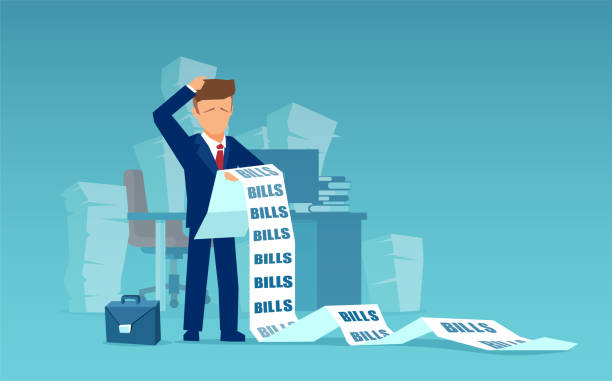

In [31]:
load_risk = df["Loan_Default_Risk"].value_counts(normalize=1).nlargest(10)[::-1] * 100

load_risk.apply(lambda x: f"{x:0.2f} %")

Loan_Default_Risk
1    13.00 %
0    87.00 %
Name: proportion, dtype: object

### "1" => indicates a high risk of default,  "0" => indicates a low risk of default

In [32]:
fig = px.bar(
    data_frame = load_risk,
    x = ["Low Risk" if i == 0 else "High Risk" for i in load_risk.index],
    y = load_risk,
    color = load_risk.index.astype(str),
    title = "Loan Default Risk" ,
    labels= {"x" :"Loan Default Risk", "y": "Frequency in PCT(%)"},
    template="plotly_dark",
    text = load_risk.apply(lambda x: f"{x:0.1f}%")
)

update_layout()


fig.update_traces(
    textfont = {
        "size" : 18,
        "family" :"consolas",
        "color": "#fff"
    },
    hovertemplate = "Loan Default Risk: %{x}<br>Frequency in PCT(%): %{y:0.0f}",
)

iplot(fig)

# 🤖Time To Build Our Model 🤩

<p style = "color: #070A52;
            font: bold 24px tahoma;
            background-color: #fff;
            padding: 18px;
            border: 8px solid #070A52;
            border-radius: 8px"> 
    1] Encoding Categorical Data  
</p>

In [33]:
dff = df.drop(columns=['Residence_City', 'Residence_State', "Occupation", "Years_in_Current_Residence"]).copy()

In [34]:
dff.columns

Index(['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status',
       'House_Ownership', 'Vehicle_Ownership(car)',
       'Years_in_Current_Employment', 'Loan_Default_Risk'],
      dtype='object')

In [35]:
# Rename The Selected Columns
dff.columns = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status',
               'House_Ownership', 'Vehicle_Ownership','Years_in_Current_Work', 'Loan_Default_Risk']

In [36]:
dff.select_dtypes(include="object").columns

Index(['Marital_Status', 'House_Ownership', 'Vehicle_Ownership'], dtype='object')

In [37]:
df_encodded = pd.get_dummies(dff, columns=['Marital_Status', 'House_Ownership', 'Vehicle_Ownership'], 
                             drop_first=True)*1


<p style = "color: #070A52;
            font: bold 24px tahoma;
            background-color: #fff;
            padding: 18px;
            border: 8px solid #070A52;
            border-radius: 8px"> 
    2] Splitting Data Into Train & Test
</p>

In [38]:
X = df_encodded.drop(columns=["Loan_Default_Risk"])
y = df_encodded["Loan_Default_Risk"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=79)

<p style = "color: #070A52;
            font: bold 24px tahoma;
            background-color: #fff;
            padding: 18px;
            border: 8px solid #070A52;
            border-radius: 8px"> 
    3] Data Transformation
</p>

In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Save The Scaler To Be Used Later in The Deployment With Streamlit
# pd.to_pickle(scaler, "model_min_max_scaler.pkl")

<p style = "color: #070A52;
            font: bold 24px tahoma;
            background-color: #fff;
            padding: 18px;
            border: 8px solid #070A52;
            border-radius: 8px"> 
    4] Data Over Sampling [SMOTE] ON ONLY TRAIN DATA
</p>

In [42]:
smote_tomek = SMOTETomek(random_state=79)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

In [43]:
X_train.shape

(139264, 8)

# Deep Learning Model ❄️

In [44]:
model = Sequential([
    Dense(512, activation="relu", input_dim = X.shape[1]),

    Dense(256, activation="relu"),
    
    Dense(128, activation="relu"),    

    Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,961 (660.00 KB)

 Trainable params: 168,961 (660.00 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

history = model.fit(X_train, y_train, batch_size=100, epochs=100, 
                    validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
  92/1393 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5481 - loss: 0.6889

I0000 00:00:1711445646.827637      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711445646.842549      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1393/1393 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5588 - loss: 0.6830 - val_accuracy: 0.4762 - val_loss: 0.6956
Epoch 2/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5908 - loss: 0.6590 - val_accuracy: 0.4639 - val_loss: 0.6901
Epoch 3/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6236 - loss: 0.6304 - val_accuracy: 0.5425 - val_loss: 0.6525
Epoch 4/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6581 - loss: 0.5948 - val_accuracy: 0.6529 - val_loss: 0.5733
Epoch 5/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6982 - loss: 0.5541 - val_accuracy: 0.6464 - val_loss: 0.5629
Epoch 6/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7318 - loss: 0.5106 - val_accuracy: 0.7007 - val_loss: 0.5255
Epoch 7/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7572 - loss: 0.4771 - val_accuracy: 0.7474 - val_loss: 0.4614
Epoch 8/100
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7797 - loss: 0.4491 - val_

In [46]:
train_loss, train_acc = model.evaluate(X_train, y_train)

print(f"Training Loss: {train_loss:0.4f}")
print(f"Training Accuracy: {train_acc*100:0.4f}")

4352/4352 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9191 - loss: 0.2155
Training Loss: 0.1889
Training Accuracy: 93.9690


In [47]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Testing Loss: {test_loss:0.4f}")
print(f"Testing Accuracy: {test_acc*100:0.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9093 - loss: 0.2374
Testing Loss: 0.2415
Testing Accuracy: 90.8000


In [48]:
# Assuming 'history' is your training history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
valid_accuracy = history.history['val_accuracy']
valid_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(train_accuracy))]


# Create DataFrame for Loss Plot
loss_df = pd.DataFrame({'Epochs': epochs,
                        'Training Loss': train_loss,
                        'Validation Loss': valid_loss})

# Loss Plot
fig_loss = px.line(data_frame=loss_df,x = "Epochs", y=['Training Loss', 'Validation Loss'], 
                   labels={'value':'Loss', 'x':'Epochs'}, 
                   line_shape='linear', line_dash_sequence=['solid', 'dash'],
                   title='Loss', color_discrete_sequence=['#FF0060', '#00DFA2'],
                   template = "plotly_dark", height=550,)



# Create DataFrame for Accuracy Plot
acc_df = pd.DataFrame({'Epochs': epochs,
                       'Training Accuracy': train_accuracy,
                       'Validation Accuracy': valid_accuracy})

# Accuracy Plot
fig_acc = px.line(data_frame=acc_df, x="Epochs", y=['Training Accuracy', 'Validation Accuracy'], 
                  labels={'value':'Accuracy', 'x':'Epochs'},
                  line_shape='linear', line_dash_sequence=['solid', 'dash'],
                  title='Accuracy', color_discrete_sequence=['#FF0060', '#00DFA2'],
                   template = "plotly_dark", height=550)


iplot(fig_loss)
iplot(fig_acc)

In [49]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5) * 1

cm = confusion_matrix(y_test, predictions)
ticks = df["Loan_Default_Risk"].map({0:"Low Risk", 1:"High Risk"}).unique()

fig = px.imshow(cm, aspect=True, text_auto=True, x=ticks, y =ticks, template="plotly_dark",
          color_continuous_scale="orrd", title="Confusion Matrix of Deepp Learning Model")
iplot(fig)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     17371
           1       0.59      0.96      0.73      2629

    accuracy                           0.91     20000
   macro avg       0.79      0.93      0.84     20000
weighted avg       0.94      0.91      0.92     20000



In [51]:
# Save Our Model To Use In Deployment with Streamlit
# model.save("loan_defualt_risk_detection_ann_v3.h5")

# XGBoost Model 🚀 

In [52]:
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'gamma': [0, 0.25, 0.4, 0.5, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

In [53]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, 
                                   scoring="roc_auc", cv=5, verbose=3, random_state=42)


random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.25, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.831 total time=   0.6s
[CV 2/5] END colsample_bytree=0.7, gamma=0.25, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.830 total time=   0.5s
[CV 3/5] END colsample_bytree=0.7, gamma=0.25, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.826 total time=   0.5s
[CV 4/5] END colsample_bytree=0.7, gamma=0.25, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.831 total time=   0.6s
[CV 5/5] END colsample_bytree=0.7, gamma=0.25, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.838 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=7, subsample=0.7;, score=0.882 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.3, ma

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.4, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [54]:
p = random_search.best_params_
for k, v in p.items():
    print(f"{k}={v},")

subsample=1.0,
min_child_weight=5,
max_depth=15,
learning_rate=0.1,
gamma=0,
colsample_bytree=0.8,


In [55]:
model = XGBClassifier(
    objective="binary:logistic",
    subsample=1.0,
    min_child_weight=5,
    max_depth=15,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8,
)

In [56]:
# Cross Validation Score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv = kf)

print(f"CROSS VALIDATION SCORE: {np.mean(scores)*100:0.2f}%")

CROSS VALIDATION SCORE: 92.16%


In [57]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)*100
print(f"TRAIN SCORE {train_score:0.2f}%")

TRAIN SCORE 96.01%


In [58]:
predictions = model.predict(X_test)
test_score = accuracy_score(y_test, predictions)*100
print(f"TEST SCORE {test_score:0.2f}%")

TEST SCORE 93.27%


In [59]:
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
ticks = df["Loan_Default_Risk"].map({0:"Low Risk", 1:"High Risk"}).unique()

fig = px.imshow(cm, aspect=True, text_auto=True, x=ticks, y =ticks, template="plotly_dark",
          color_continuous_scale="orrd", title="Confusion Matrix of XGBoost Model")
iplot(fig)

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     17371
           1       0.66      0.98      0.79      2629

    accuracy                           0.93     20000
   macro avg       0.83      0.95      0.88     20000
weighted avg       0.95      0.93      0.94     20000



In [61]:
# pd.to_pickle(model, "loan_defualt_risk_detection_xgboost_v1.pkl")

<p style = "color: #070A52;
            font: bold 22px tahoma;
            background-color: #fff;
            padding: 18px;
            border: 3px dashed #070A52;
            border-radius: 8px"> 
    ♣ XGBoost Model:
    <br>    
    <br>
    🚀 Cross Validation Score:  92.16%
    <br>
    <br>
    🚀 Training Score: 96.01%
    <br>
    <br>
    🚀 Test Score: 93.27%
    
</p>

# ♠ Streamlit Web APP 🤩🚀

## Web App Link: <a href = "https://loan-default-prediction-ffdzmg628wksvcaey7kwpi.streamlit.app/" style = "color: red">Click Here To Visit Streamlit Web App</a>🥰📊

## GitHub Repo: <a href = "https://github.com/modyehab810/Loan-Default-Prediction">Click Here To Go To GitHub Repo..</a>

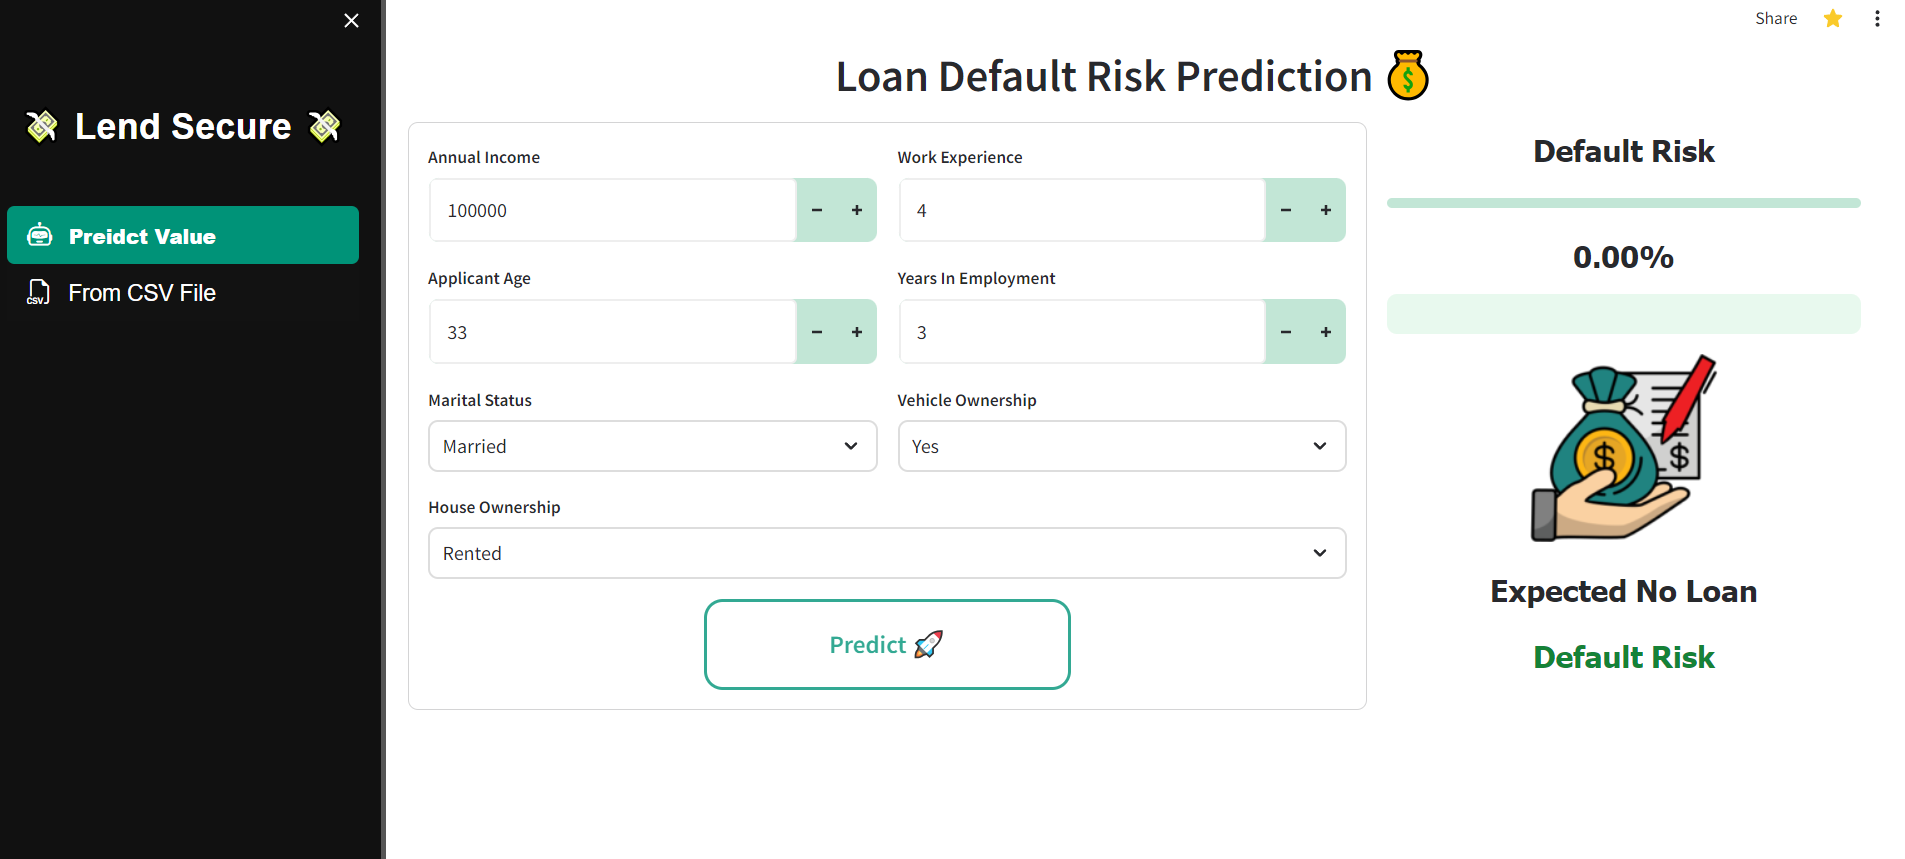